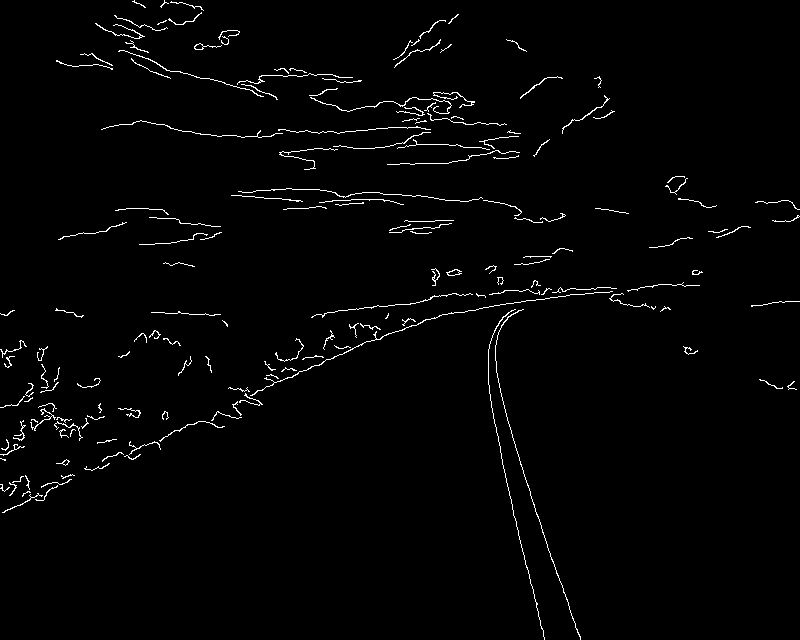

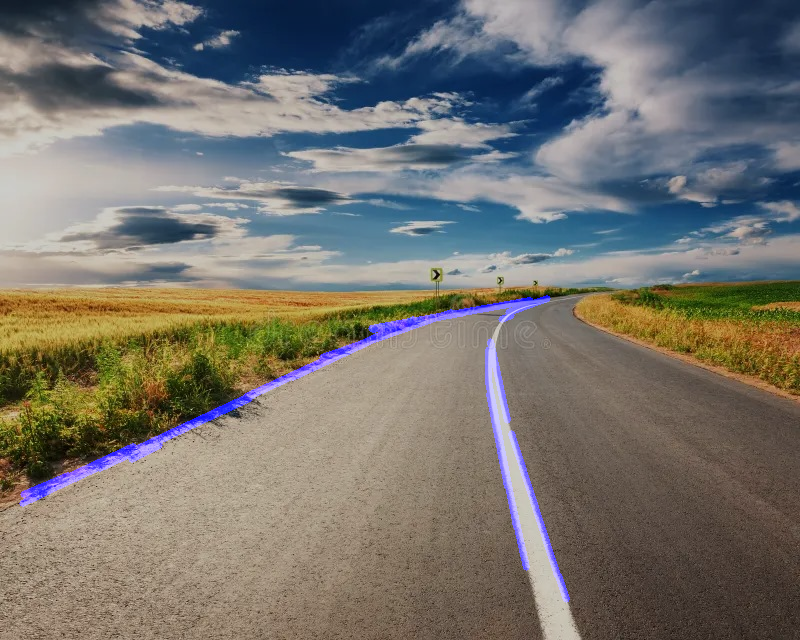

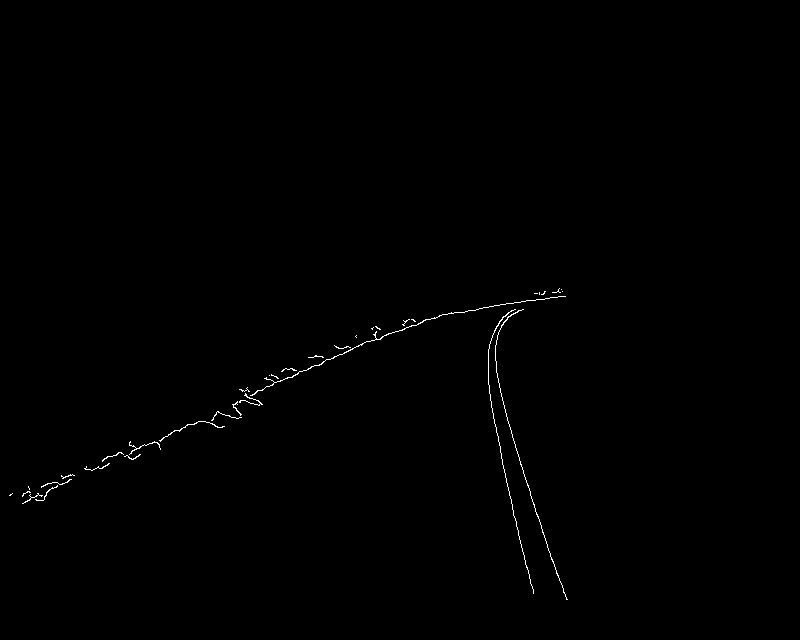

In [10]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
def dynamic_mask(img, verts):
    m = np.zeros_like(img)
    cv2.fillPoly(m, verts, 255)
    return cv2.bitwise_and(img, m)
def adaptive_hough_lines(img, r, t, thresh, min_len, max_gap):
    return cv2.HoughLinesP(img, r, t, thresh, np.array([]), minLineLength=min_len, maxLineGap=max_gap)
def render_lines(img, l, clr=[255, 0, 0], thk=5):
    if l is not None:
        for ln in l:
            for x1, y1, x2, y2 in ln:
                cv2.line(img, (x1, y1), (x2, y2), clr, thk)
def improved_process(img_pth):
    frm = cv2.imread(img_pth)
    gray = cv2.cvtColor(frm, cv2.COLOR_BGR2GRAY)
    blur = cv2.GaussianBlur(gray, (7, 7), 0)
    v_mean, v_stddev = np.mean(blur), np.std(blur)
    low_thresh = int(max(0, (v_mean - v_stddev)))
    high_thresh = int(min(255, (v_mean + v_stddev)))
    edg = cv2.Canny(blur, low_thresh, high_thresh)
    h, w = frm.shape[:2]
    verts = np.array([[
        (0, int(h * 0.78)),
        (w, h),
        (int(w * 0.7), int(h * 0.45)),
        (int(w * 0.47), int(h * 0.51))
    ]], dtype=np.int32)
    masked = dynamic_mask(edg, verts)
    lns = adaptive_hough_lines(masked, r=1, t=np.pi / 180, thresh=30, min_len=0, max_gap=30)
    ln_img = np.zeros((frm.shape[0], frm.shape[1], 3), dtype=np.uint8)
    render_lines(ln_img, lns)
    res = cv2.addWeighted(frm, 0.8, ln_img, 1, 0)
    cv2_imshow(edg)
    cv2_imshow(res)
    cv2_imshow(masked)
    cv2.destroyAllWindows()

img_pth = '/content/sample_data/my photo.jpeg'
improved_process(img_pth)
